In [220]:
# pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 254.3 kB/s eta 0:01:13
   - -------------------------------------- 0.5/19.1 MB 254.3 kB/s eta 0:01:13
   - -------------------------------------- 0.5/19.1 MB 254.3 kB/s eta 0:01:13
   - -------------------------------------- 0.5/19.1 MB 254.3 kB/s eta 0:01:13
   - -------------------------------------- 0.5/19.1 MB 254.3 kB/s eta 0:01:13
   - -------------------------------------- 0.5/19.1 MB 254.3 kB/s eta 0:01:13
   - -------------------------------

# GlobalAQI
This program will show the analytics about the Air Quality index according to each country from the dataset.

Source of dataset : [Kaggle Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data)


### Import required libraries

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Read and Exploring data
The `GlobalWeatherRepository.csv` contains information about the Air Quality Index based on the Contry. The Data contains some columns:
1. **country** : Country of the weather data
2. **location_name** : Name of the location (city)
3. **latitude** : Latitude coordinate of the location
4. **longitude** : Longitude coordinate of the location
5. **timezone** : Timezone of the location
6. **last_updated_epoch** :Unix timestamp of the last data update
7. **last_updated** : Local time of the last data update
8. **temperature_celsius** : Temperature in degrees Celsius
9. **temperature_fahrenheit** : Temperature in degrees Fahrenheit
10. **condition_text** : Weather condition description

**Particulate Matter (PM)** : a type of pollutant that can be present in indoor or ambient air. The number that follows PM in each term refers to the aerodynamic diameter of the particles.

In [284]:
df = pd.read_csv('./GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


The dataset that we read contains 38229 rows unique of data, with 41 unique columns (30 Numerical Columns and 11 Categorical Columns), and no rows containing null or missing data.


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38229 entries, 0 to 38228
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       38229 non-null  object 
 1   location_name                 38229 non-null  object 
 2   latitude                      38229 non-null  float64
 3   longitude                     38229 non-null  float64
 4   timezone                      38229 non-null  object 
 5   last_updated_epoch            38229 non-null  int64  
 6   last_updated                  38229 non-null  object 
 7   temperature_celsius           38229 non-null  float64
 8   temperature_fahrenheit        38229 non-null  float64
 9   condition_text                38229 non-null  object 
 10  wind_mph                      38229 non-null  float64
 11  wind_kph                      38229 non-null  float64
 12  wind_degree                   38229 non-null  int64  
 13  w

In [286]:
df.describe(include='all')

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
count,38229,38229,38229.000000,38229.000000,38229,3.822900e+04,38229,38229.000000,38229.000000,38229,...,38229.000000,38229.000000,38229.000000,38229.000000,38229,38229,38229,38229,38229,38229.000000
unique,210,248,NaN,NaN,190,NaN,5677,NaN,NaN,41,...,NaN,NaN,NaN,NaN,391,516,1441,1441,8,NaN
top,Bulgaria,Kabul,NaN,NaN,Asia/Bangkok,NaN,2024-11-14 10:15,NaN,NaN,Partly cloudy,...,NaN,NaN,NaN,NaN,05:56 AM,06:02 PM,No moonrise,No moonset,Waxing Gibbous,NaN
freq,426,197,NaN,NaN,735,NaN,44,NaN,NaN,12842,...,NaN,NaN,NaN,NaN,506,421,1353,1162,8634,NaN
mean,NaN,NaN,19.139558,22.143661,NaN,1.724360e+09,NaN,24.565013,76.218575,NaN,...,20.427122,38.303229,1.542442,2.224934,NaN,NaN,NaN,NaN,NaN,49.170054
std,NaN,NaN,24.486511,65.794060,NaN,4.974199e+06,NaN,7.945784,14.302400,NaN,...,46.084326,92.666983,0.883540,2.203916,NaN,NaN,NaN,NaN,NaN,34.757529
min,NaN,NaN,-41.300000,-175.200000,NaN,1.715849e+09,NaN,-20.100000,-4.200000,NaN,...,0.185000,0.185000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,3.750000,-6.836100,NaN,1.720012e+09,NaN,20.400000,68.700000,NaN,...,3.700000,6.400000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,15.000000
50%,NaN,NaN,17.250000,23.320000,NaN,1.724415e+09,NaN,26.100000,79.000000,NaN,...,10.000000,16.500000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,49.000000
75%,NaN,NaN,40.400000,50.580000,NaN,1.728640e+09,NaN,29.200000,84.600000,NaN,...,22.385000,38.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,83.000000


In [287]:
# Count numeric columns
numeric_columns_count = df.select_dtypes(include='number').shape[1]

# Count categorical columns
categorical_columns_count = df.select_dtypes(include='object').shape[1]

# Display the counts
print(f'Number of numeric columns: {numeric_columns_count}')
print(f'Number of categorical columns: {categorical_columns_count}')

# Check the shape of the dataset
print(f'Shape of the Dataset is: {df.shape}')

Number of numeric columns: 30
Number of categorical columns: 11
Shape of the Dataset is: (38229, 41)


In [288]:
df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [289]:
if df.duplicated().sum() > 0 :
    print("There are duplicated data!")
    print("Removing the duplicated data...")
    df = df.drop_duplicates(inplace=True)
else:
    print("There are no duplicated data!")



There are no duplicated data!


### Exploring Data

In [290]:
print("Total Unique Data with top 5 unique data:")
for column in df.columns:
    print(f"{column} ({str(df[column].nunique())} unique datas) : ")
    print(f"Min : {str(min(df[column]))}")
    print(f"Max : {str(max(df[column]))}")
    print("Top 5 data :")
    print(df[column].unique()[0:5])
    print()

Total Unique Data with top 5 unique data:
country (210 unique datas) : 
Min : Afghanistan
Max : 火鸡
Top 5 data :
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola']

location_name (248 unique datas) : 
Min : 'S Gravenjansdijk
Max : Zagreb
Top 5 data :
['Kabul' 'Tirana' 'Algiers' 'Andorra La Vella' 'Luanda']

latitude (383 unique datas) : 
Min : -41.3
Max : 64.15
Top 5 data :
[34.52 41.33 36.76 42.5  -8.84]

longitude (389 unique datas) : 
Min : -175.2
Max : 179.22
Top 5 data :
[69.18 19.82  3.05  1.52 13.23]

timezone (190 unique datas) : 
Min : Africa/Accra
Max : Pacific/Tongatapu
Top 5 data :
['Asia/Kabul' 'Europe/Tirane' 'Africa/Algiers' 'Europe/Andorra'
 'Africa/Luanda']

last_updated_epoch (277 unique datas) : 
Min : 1715849100
Max : 1732878000
Top 5 data :
[1715849100 1715868000 1715868900 1715961600 1715962500]

last_updated (5677 unique datas) : 
Min : 2024-05-16 01:45
Max : 2024-11-29 23:45
Top 5 data :
['2024-05-16 13:15' '2024-05-16 10:45' '2024-05-16 09:45'
 '2024-05-16 0

[338 320 280 215 150]

wind_direction (16 unique datas) : 
Min : E
Max : WSW
Top 5 data :
['NNW' 'NW' 'W' 'SW' 'SSE']

pressure_mb (72 unique datas) : 
Min : 971.0
Max : 1047.0
Top 5 data :
[1012. 1011. 1007. 1013. 1014.]

pressure_in (175 unique datas) : 
Min : 28.67
Max : 30.92
Top 5 data :
[29.89 29.88 29.85 29.75 29.91]

precip_mm (459 unique datas) : 
Min : 0.0
Max : 42.24
Top 5 data :
[0.   0.1  0.3  0.02 0.13]

precip_in (57 unique datas) : 
Min : 0.0
Max : 1.66
Top 5 data :
[0.   0.01 0.07 0.03 0.02]

humidity (99 unique datas) : 
Min : 2
Max : 100
Top 5 data :
[24 94 29 61 89]

cloud (101 unique datas) : 
Min : 0
Max : 100
Top 5 data :
[ 30  75   0 100  50]

feels_like_celsius (628 unique datas) : 
Min : -27.8
Max : 51.2
Top 5 data :
[25.3 19.  24.6  3.8 28.7]

feels_like_fahrenheit (1082 unique datas) : 
Min : -18.1
Max : 124.2
Top 5 data :
[77.5 66.2 76.4 38.9 83.6]

visibility_km (65 unique datas) : 
Min : 0.0
Max : 32.0
Top 5 data :
[10.  2.  0. 24.  7.]

visibility_miles 

In [291]:
# Country with the highest Temperature Degree
highest_temperature_country = df[df['temperature_celsius'] == df['temperature_celsius'].max()]
print("Country with the highest temperature:")
print(f"Country: {highest_temperature_country['country'].values[0]}")
print(f"Location Name: {highest_temperature_country['location_name'].values[0]}")
print(f"Temperature in Celcius: {highest_temperature_country['temperature_celsius'].values[0]}")
print(f"Latitude: {highest_temperature_country['latitude'].values[0]}")
print(f"Longitude: {highest_temperature_country['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {highest_temperature_country['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {highest_temperature_country['air_quality_PM10'].values[0]}")

Country with the highest temperature:
Country: Kuwait
Location Name: Kuwait City
Temperature in Celcius: 49.2
Latitude: 29.37
Longitude: 47.96
Air Quality (PM2.5): 33.6
Air Quality (PM10): 187.0


In [292]:
# Country with the Lowest Temperature Degree
lowest_temperature_country = df[df['temperature_celsius'] == df['temperature_celsius'].min()]
print("Country with the lowest temperature:")
print(f"Country: {lowest_temperature_country['country'].values[0]}")
print(f"Location Name: {lowest_temperature_country['location_name'].values[0]}")
print(f"Temperature in Celcius: {lowest_temperature_country['temperature_celsius'].values[0]}")
print(f"Latitude: {lowest_temperature_country['latitude'].values[0]}")
print(f"Longitude: {lowest_temperature_country['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {lowest_temperature_country['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {lowest_temperature_country['air_quality_PM10'].values[0]}")

Country with the lowest temperature:
Country: Mongolia
Location Name: Ulaanbaatar
Temperature in Celcius: -20.1
Latitude: 47.9167
Longitude: 106.9167
Air Quality (PM2.5): 6.105
Air Quality (PM10): 6.845


In [293]:
# Country with the highest Air Quality (PM2.5)
highest_Air_Quality_25_country = df[df['air_quality_PM2.5'] == df['air_quality_PM2.5'].max()]
print("Country with the highest Air Quality (PM2.5):")
print(f"Country: {highest_Air_Quality_25_country['country'].values[0]}")
print(f"Location Name: {highest_Air_Quality_25_country['location_name'].values[0]}")
print(f"Temperature in Celcius: {highest_Air_Quality_25_country['temperature_celsius'].values[0]}")
print(f"Latitude: {highest_Air_Quality_25_country['latitude'].values[0]}")
print(f"Longitude: {highest_Air_Quality_25_country['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {highest_Air_Quality_25_country['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {highest_Air_Quality_25_country['air_quality_PM10'].values[0]}")

Country with the highest Air Quality (PM2.5):
Country: Chile
Location Name: Santiago
Temperature in Celcius: 11.0
Latitude: -33.45
Longitude: -70.67
Air Quality (PM2.5): 1614.1
Air Quality (PM10): 1814.4


In [294]:
# Country with the Lowest Temperature Degree
lowest_Air_Quality_25_country = df[df['air_quality_PM2.5'] == df['air_quality_PM2.5'].min()]
print("Country with the lowest Air Quality (PM2.5):")
print(f"Country: {lowest_Air_Quality_25_country['country'].values[0]}")
print(f"Location Name: {lowest_Air_Quality_25_country['location_name'].values[0]}")
print(f"Temperature in Celcius: {lowest_Air_Quality_25_country['temperature_celsius'].values[0]}")
print(f"Latitude: {lowest_Air_Quality_25_country['latitude'].values[0]}")
print(f"Longitude: {lowest_Air_Quality_25_country['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {lowest_Air_Quality_25_country['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {lowest_Air_Quality_25_country['air_quality_PM10'].values[0]}")

Country with the lowest Air Quality (PM2.5):
Country: Belize
Location Name: Belmopan
Temperature in Celcius: 22.8
Latitude: 17.25
Longitude: -88.7667
Air Quality (PM2.5): 0.185
Air Quality (PM10): 0.185


In [295]:
# Country with the highest Air Quality (PM10)
highest_Air_Quality_10_country = df[df['air_quality_PM10'] == df['air_quality_PM10'].max()]
print("Country with the highest Air Quality (PM10):")
print(f"Country: {highest_Air_Quality_10_country['country'].values[0]}")
print(f"Location Name: {highest_Air_Quality_10_country['location_name'].values[0]}")
print(f"Temperature in Celcius: {highest_Air_Quality_10_country['temperature_celsius'].values[0]}")
print(f"Latitude: {highest_Air_Quality_10_country['latitude'].values[0]}")
print(f"Longitude: {highest_Air_Quality_10_country['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {highest_Air_Quality_10_country['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {highest_Air_Quality_10_country['air_quality_PM10'].values[0]}")

Country with the highest Air Quality (PM10):
Country: Saudi Arabia
Location Name: Riyadh
Temperature in Celcius: 18.1
Latitude: 24.6408
Longitude: 46.7728
Air Quality (PM2.5): 563.325
Air Quality (PM10): 5554.81


In [296]:
# Country with the Lowest Temperature Degree
lowest_Air_Quality_10_country = df[df['air_quality_PM10'] == df['air_quality_PM10'].min()]
print("Country with the lowest Air Quality (PM10):")
print(f"Country: {lowest_Air_Quality_10_country['country'].values[0]}")
print(f"Location Name: {lowest_Air_Quality_10_country['location_name'].values[0]}")
print(f"Temperature in Celcius: {lowest_Air_Quality_10_country['temperature_celsius'].values[0]}")
print(f"Latitude: {lowest_Air_Quality_10_country['latitude'].values[0]}")
print(f"Longitude: {lowest_Air_Quality_10_country['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {lowest_Air_Quality_10_country['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {lowest_Air_Quality_10_country['air_quality_PM10'].values[0]}")

Country with the lowest Air Quality (PM10):
Country: Belize
Location Name: Belmopan
Temperature in Celcius: 22.8
Latitude: 17.25
Longitude: -88.7667
Air Quality (PM2.5): 0.185
Air Quality (PM10): 0.185


In [297]:
# Last Update Insight
lastest_updated_information = df[df['last_updated'] == df['last_updated'].max()]
print("Country with the lastest data update:")
print(f"Updated on : {lastest_updated_information['last_updated'].values[0] }")
print(f"Country: {lastest_updated_information['country'].values[0]}")
print(f"Location Name: {lastest_updated_information['location_name'].values[0]}")
print(f"Temperature in Celcius: {lastest_updated_information['temperature_celsius'].values[0]}")
print(f"Latitude: {lastest_updated_information['latitude'].values[0]}")
print(f"Longitude: {lastest_updated_information['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {lastest_updated_information['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {lastest_updated_information['air_quality_PM10'].values[0]}")

Country with the lastest data update:
Updated on : 2024-11-29 23:45
Country: New Zealand
Location Name: Wellington
Temperature in Celcius: 14.2
Latitude: -41.3
Longitude: 174.7833
Air Quality (PM2.5): 13.505
Air Quality (PM10): 20.905


In [298]:
# Last Update Insight
earliest_updated_information = df[df['last_updated'] == df['last_updated'].min()]
print("Country with the earliest data update:")
print(f"Updated on : {earliest_updated_information['last_updated'].values[0] }")
print(f"Country: {earliest_updated_information['country'].values[0]}")
print(f"Location Name: {earliest_updated_information['location_name'].values[0]}")
print(f"Temperature in Celcius: {earliest_updated_information['temperature_celsius'].values[0]}")
print(f"Latitude: {earliest_updated_information['latitude'].values[0]}")
print(f"Longitude: {earliest_updated_information['longitude'].values[0]}")
print(f"Air Quality (PM2.5): {earliest_updated_information['air_quality_PM2.5'].values[0]}")
print(f"Air Quality (PM10): {earliest_updated_information['air_quality_PM10'].values[0]}")

Country with the earliest data update:
Updated on : 2024-05-16 01:45
Country: United States of America
Location Name: Washington Park
Temperature in Celcius: 16.1
Latitude: 46.6
Longitude: -120.49
Air Quality (PM2.5): 6.3
Air Quality (PM10): 7.1


In [299]:
last_updated_2024_count = df[pd.to_datetime(df['last_updated']).dt.year == 2024].shape[0]
print(f"Records last updated in 2024: {last_updated_2024_count}")

Records last updated in 2024: 38229


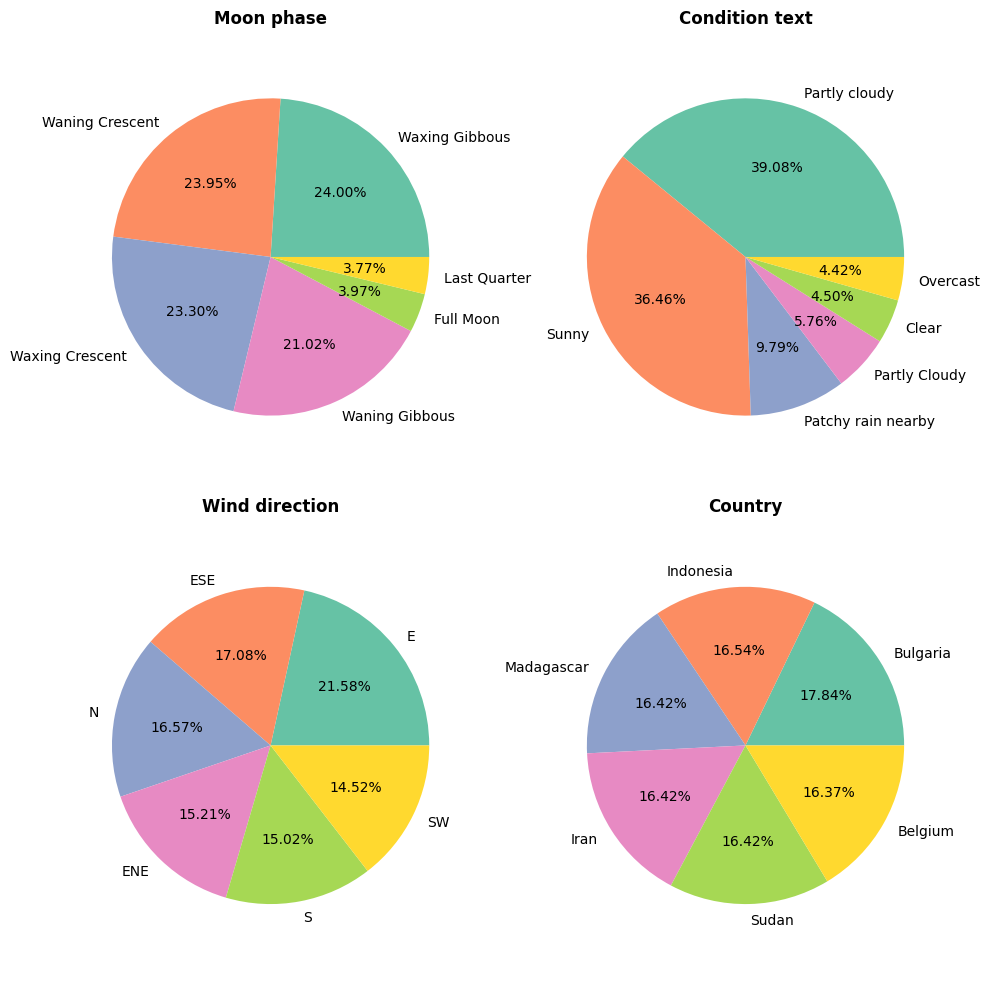

In [300]:
categorical_columns = ['moon_phase', 'condition_text', 'wind_direction', 'country']

plt.figure(figsize=(10,10))
pastel_colors = sns.color_palette("Set2", n_colors=6)
for i, column in enumerate(categorical_columns):
    # Get top 6 Largest value
    top_6_values = df[column].value_counts().nlargest(6)
    top_6_value_list = top_6_values.index.tolist()
    
    ax = plt.subplot(2, 2, i+1)
    plt.pie(top_6_values, labels=top_6_value_list, autopct='%0.2f%%', colors=pastel_colors)
    ax.set_title(f"{column.replace('_', ' ').capitalize()}", fontweight='bold')
    ax.set_ylabel('') 
    ax.axis('equal') 
plt.tight_layout()
plt.show()

In [301]:
import plotly.express as px
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [302]:
sampled_df = df.groupby('country').apply(lambda x: x.sample(min(len(x), 20))).reset_index(drop=True)
fig = px.choropleth(
    sampled_df,
    locations='country',  
    locationmode='country names',  
    color='temperature_celsius', 
    hover_name='location_name',  # Hover information
    title='<b>Geographical Distribution of Locations by Country</b>', 
    template='plotly_white'
)
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

C:\Users\natanael.sulaiman\AppData\Local\Temp\ipykernel_23128\2622789408.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [303]:
# Treemap
sampled_df = df.groupby('country').agg({
    'humidity': 'mean',
    'air_quality_Ozone': 'mean',
    'air_quality_Nitrogen_dioxide': 'mean',
    'air_quality_Sulphur_dioxide': 'mean'
}).reset_index()
fig = px.treemap(
    sampled_df,
    path=['country'],
    values='humidity',  
    color='air_quality_Ozone',  
    hover_data=['humidity', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide'],
    title='<b>Treemap of Average Humidity and Air Quality by Country</b>'
)
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

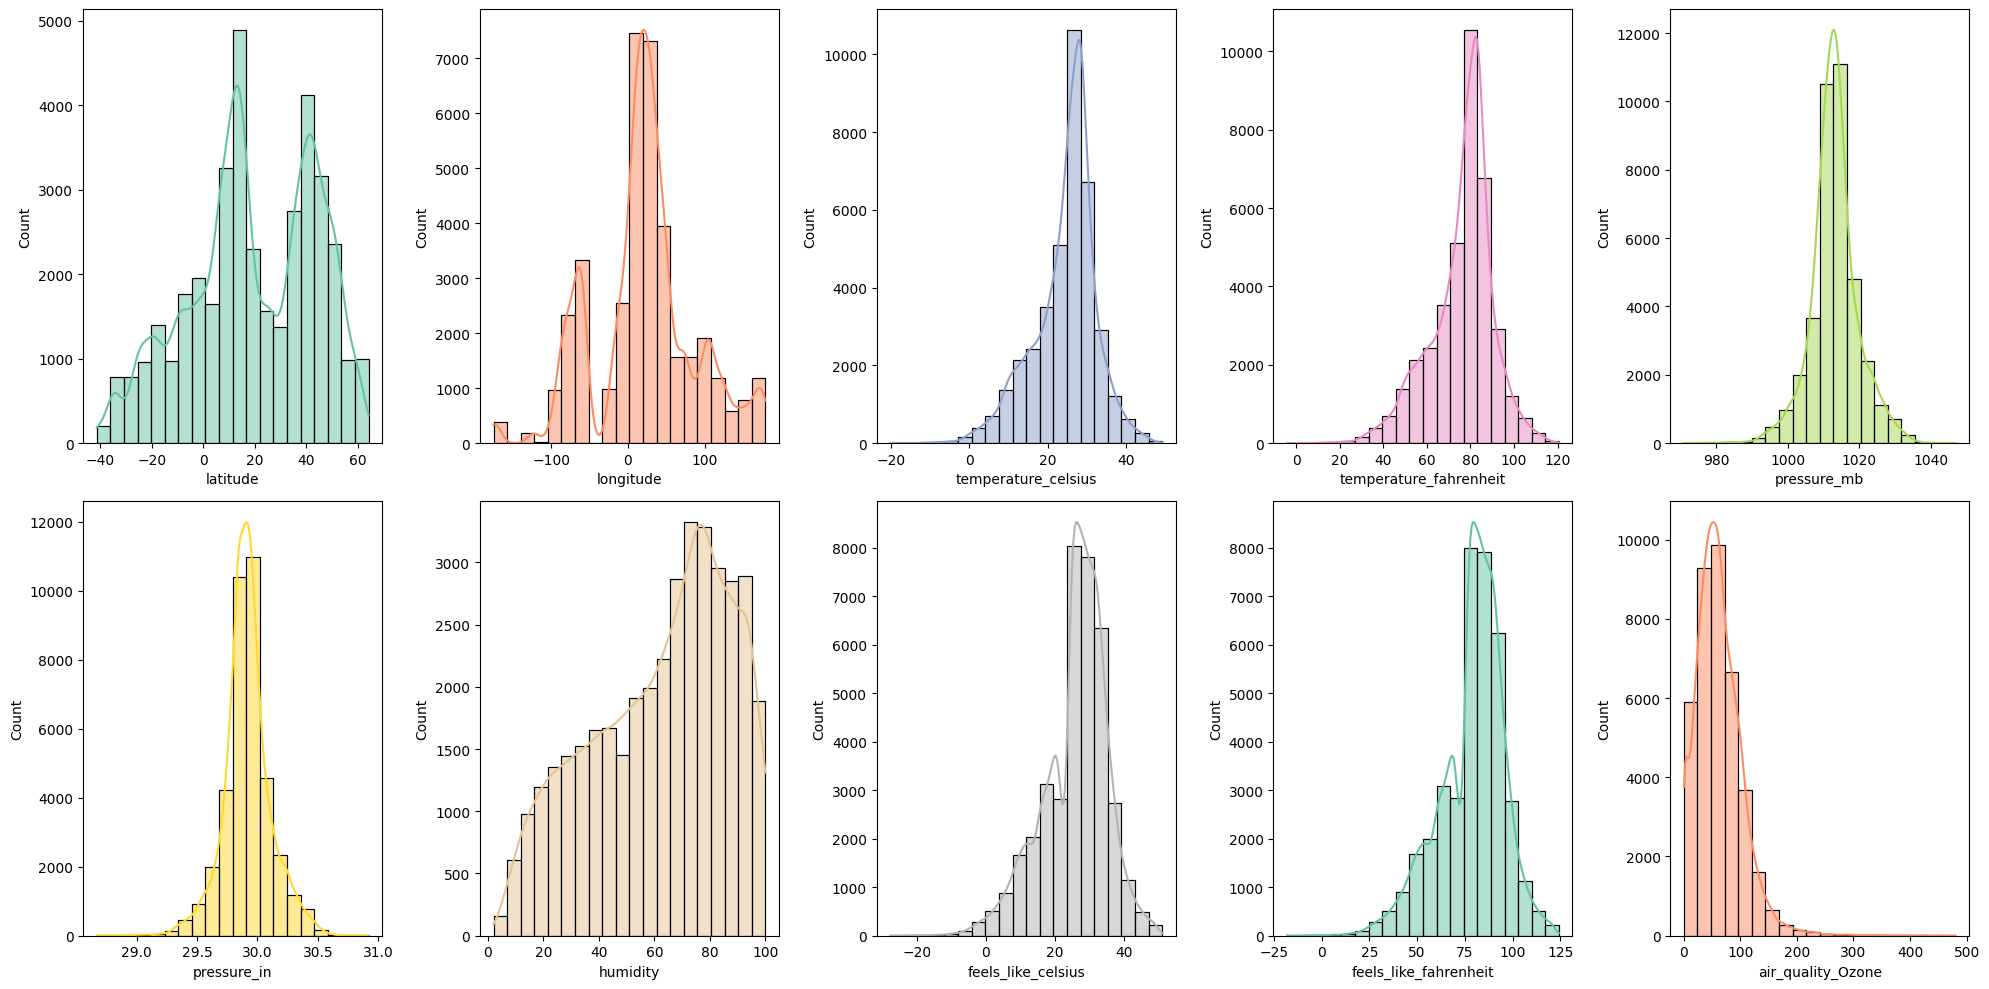

In [304]:
selected_columns = [
    'latitude', 'longitude', 'temperature_celsius',
    'temperature_fahrenheit', 'pressure_mb', 'pressure_in',
    'humidity', 'feels_like_celsius', 'feels_like_fahrenheit', 
    'air_quality_Ozone'
]


pastel_colors = sns.color_palette("Set2", 10)
plt.figure(figsize=(20, 10))

for i, col in enumerate(selected_columns):
    ax = plt.subplot(2, 5, i+1)
    sns.histplot(df[col], color=pastel_colors[i], bins=20, kde=True)

plt.tight_layout()
plt.show()

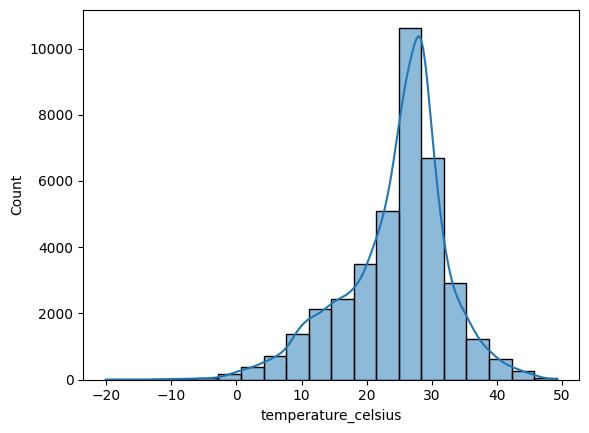

In [305]:
sns.histplot(df['temperature_celsius'], bins=20,kde=True)
plt.show()

In [306]:
air_qual_avg=df.groupby('country')[['air_quality_PM2.5','air_quality_PM10']].mean()
air_qual_avgs=air_qual_avg.sort_values(by=['air_quality_PM2.5','air_quality_PM10'])
air_qual_avgs

,air_quality_PM2.5,air_quality_PM10
country,,
كولومبيا,0.500000,0.500000
Malásia,1.800000,2.300000
Bélgica,1.800000,3.400000
Saint-Vincent-et-les-Grenadines,1.800000,4.700000
Solomon Islands,2.251746,3.626254
...,...,...
Malaysia,76.653883,95.508452
India,86.128436,128.741538
Indonesia,105.750747,140.493291


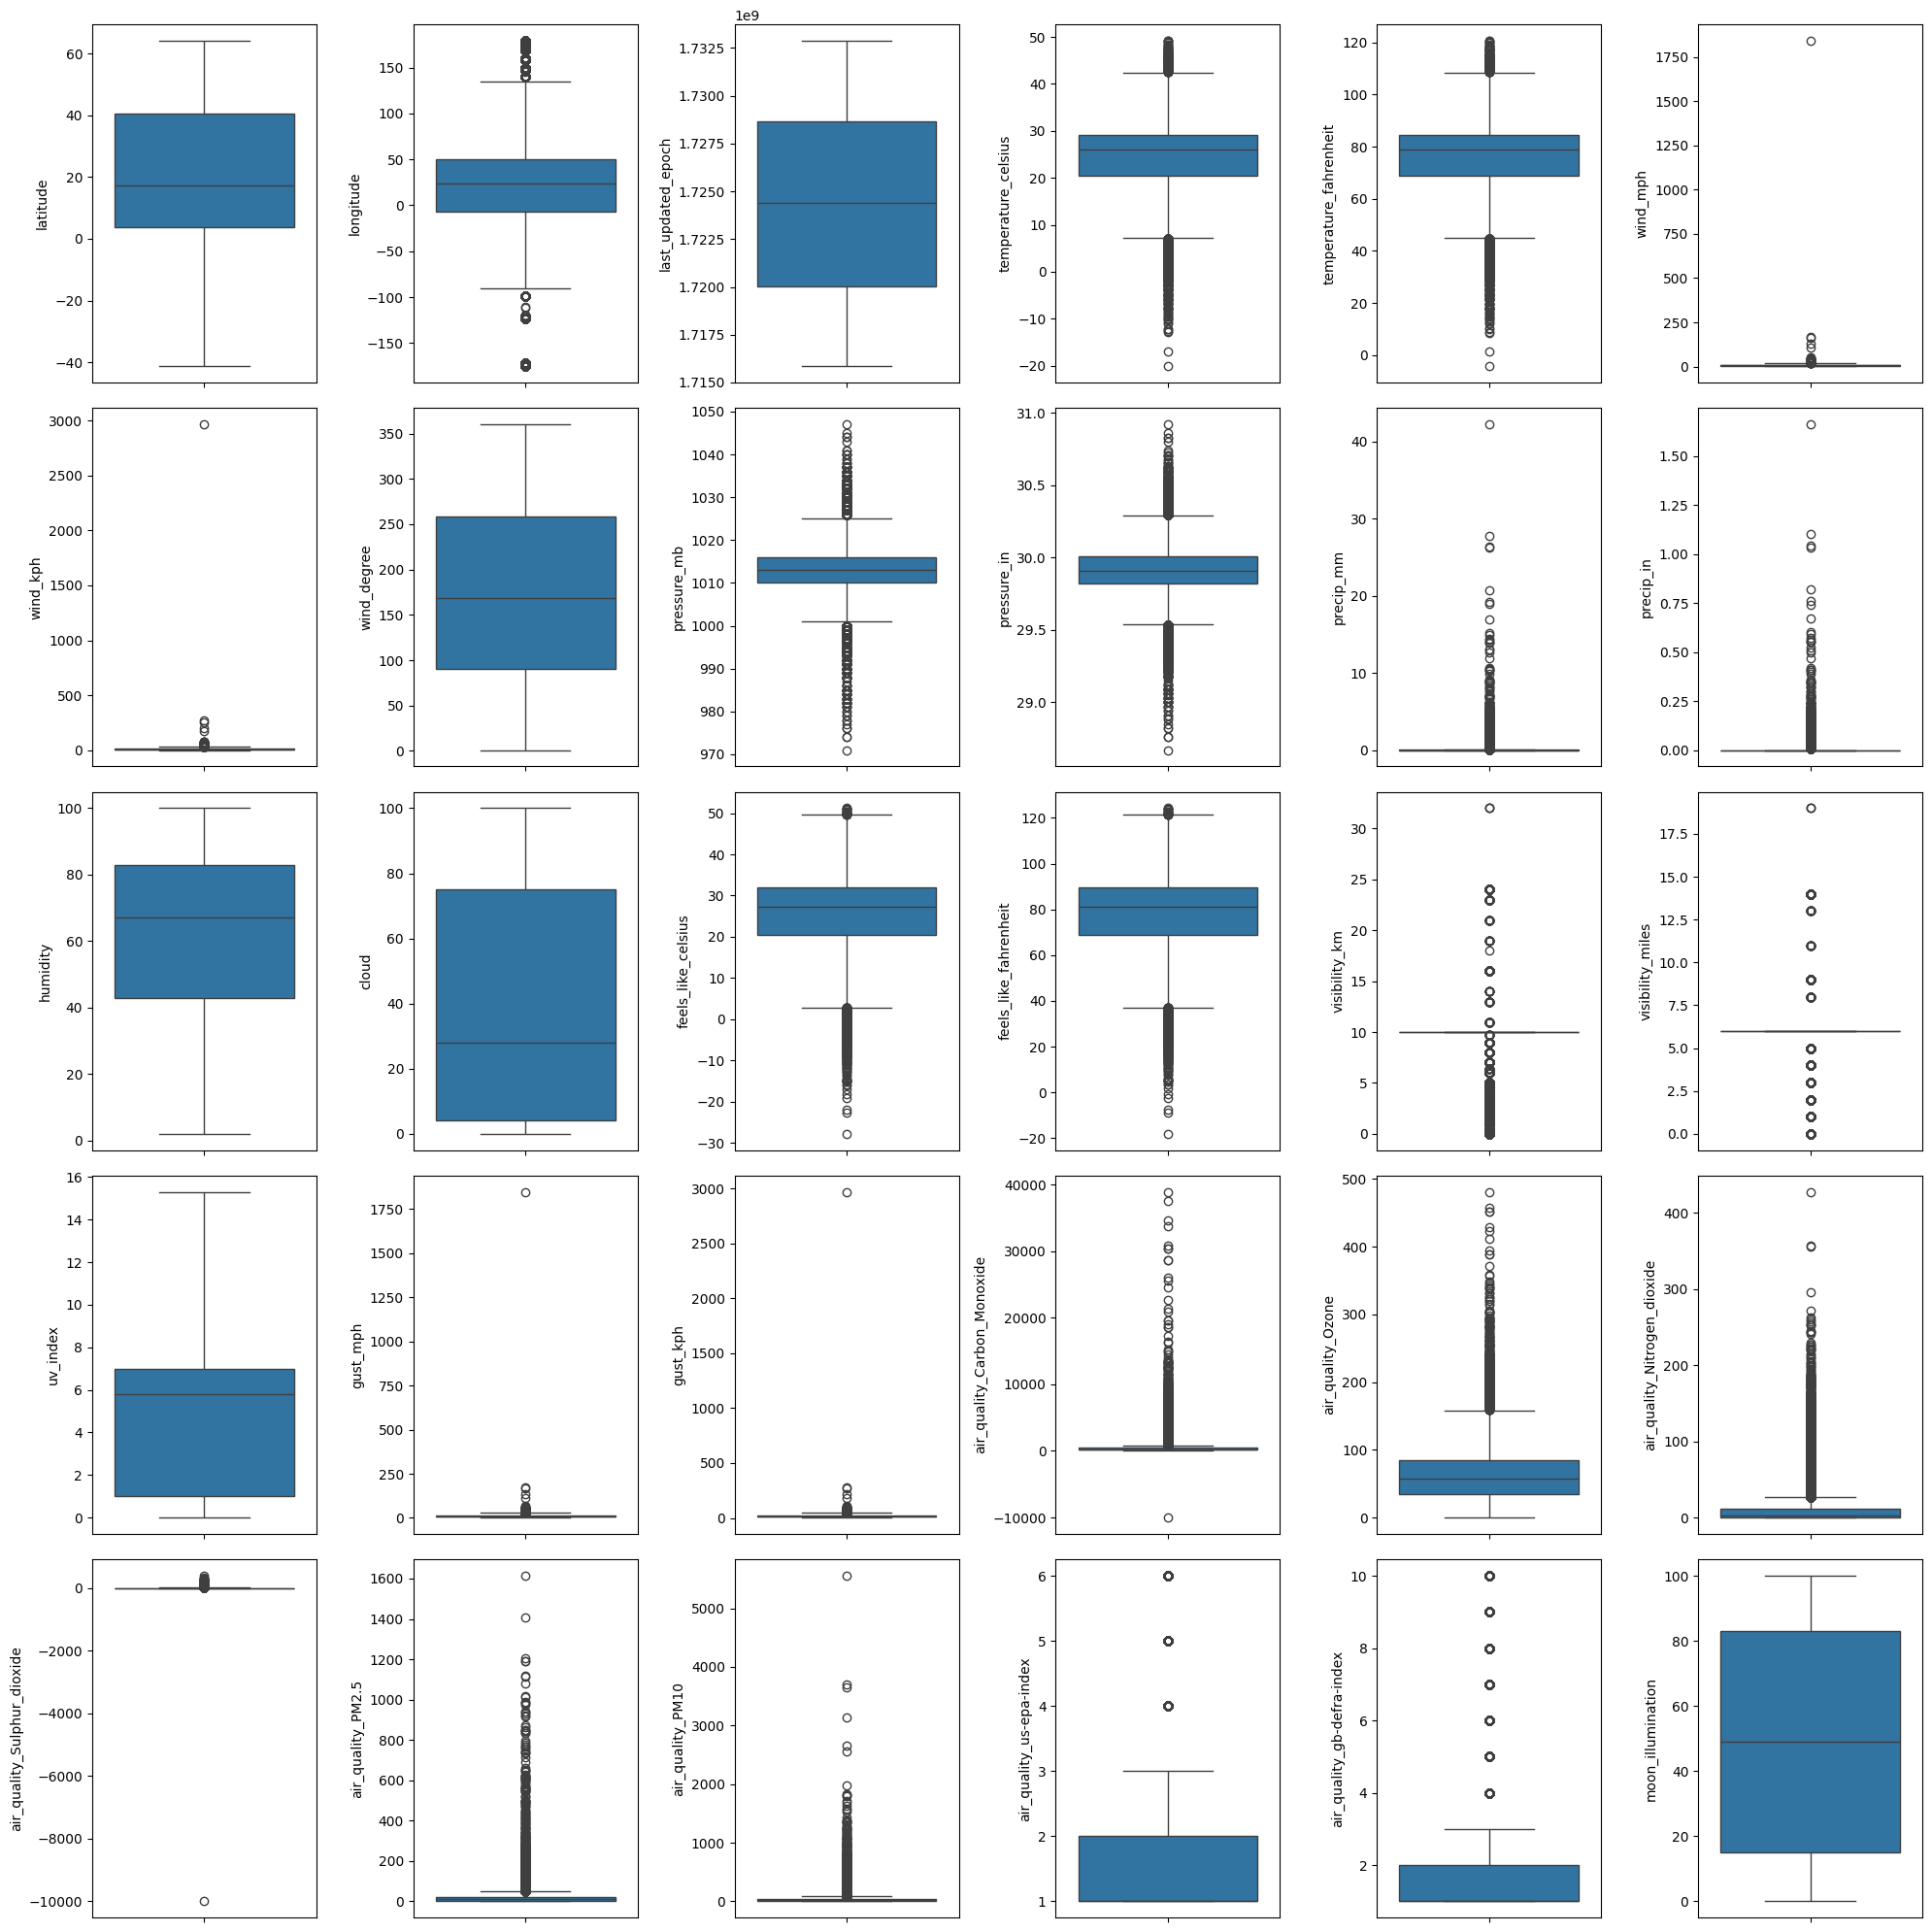

In [307]:
# Plot Boxplot from the df
columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(columns):
    ax = plt.subplot(5, 6, i+1)
    sns.boxplot(df[col])
plt.tight_layout()

In [ ]:
def removeOulier(data) : 
    columns = data.select_dtypes(include='number').columns
    df_cleaned = data.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

In [ ]:
def removeOulierEachColumn(column) : 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, lower_bound, upper_bound
    

In [309]:
df_cleaned = removeOulier(df)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16131 entries, 0 to 38226
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       16131 non-null  object 
 1   location_name                 16131 non-null  object 
 2   latitude                      16131 non-null  float64
 3   longitude                     16131 non-null  float64
 4   timezone                      16131 non-null  object 
 5   last_updated_epoch            16131 non-null  int64  
 6   last_updated                  16131 non-null  object 
 7   temperature_celsius           16131 non-null  float64
 8   temperature_fahrenheit        16131 non-null  float64
 9   condition_text                16131 non-null  object 
 10  wind_mph                      16131 non-null  float64
 11  wind_kph                      16131 non-null  float64
 12  wind_degree                   16131 non-null  int64  
 13  wind_d

In [310]:
df_cleaned.describe(include='all')

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
count,16131,16131,16131.000000,16131.000000,16131,1.613100e+04,16131,16131.000000,16131.000000,16131,...,16131.000000,16131.000000,16131.000000,16131.000000,16131,16131,16131,16131,16131,16131.000000
unique,176,202,NaN,NaN,164,NaN,3150,NaN,NaN,19,...,NaN,NaN,NaN,NaN,316,431,1441,1441,8,NaN
top,Madagascar,Dodoma,NaN,NaN,Europe/Rome,NaN,2024-08-12 14:30,NaN,NaN,Sunny,...,NaN,NaN,NaN,NaN,05:56 AM,06:03 PM,No moonrise,No moonset,Waxing Gibbous,NaN
freq,372,194,NaN,NaN,408,NaN,40,NaN,NaN,6509,...,NaN,NaN,NaN,NaN,277,195,551,467,3705,NaN
mean,NaN,NaN,19.828826,9.682766,NaN,1.723536e+09,NaN,26.059234,78.908028,NaN,...,9.041970,16.282189,1.187651,1.341826,NaN,NaN,NaN,NaN,NaN,48.546401
std,NaN,NaN,25.660307,45.995542,NaN,4.590266e+06,NaN,6.191037,11.144073,NaN,...,7.546728,15.438512,0.390445,0.579735,NaN,NaN,NaN,NaN,NaN,34.806715
min,NaN,NaN,-34.860000,-90.530000,NaN,1.715849e+09,NaN,7.200000,45.000000,NaN,...,0.500000,0.500000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,0.380000,-6.250000,NaN,1.719665e+09,NaN,22.800000,73.100000,NaN,...,3.000000,5.180000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,13.000000
50%,NaN,NaN,17.120000,18.050000,NaN,1.723378e+09,NaN,27.000000,80.600000,NaN,...,6.900000,11.470000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,48.000000
75%,NaN,NaN,42.500000,33.370000,NaN,1.727085e+09,NaN,30.000000,86.000000,NaN,...,13.135000,22.385000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,83.000000


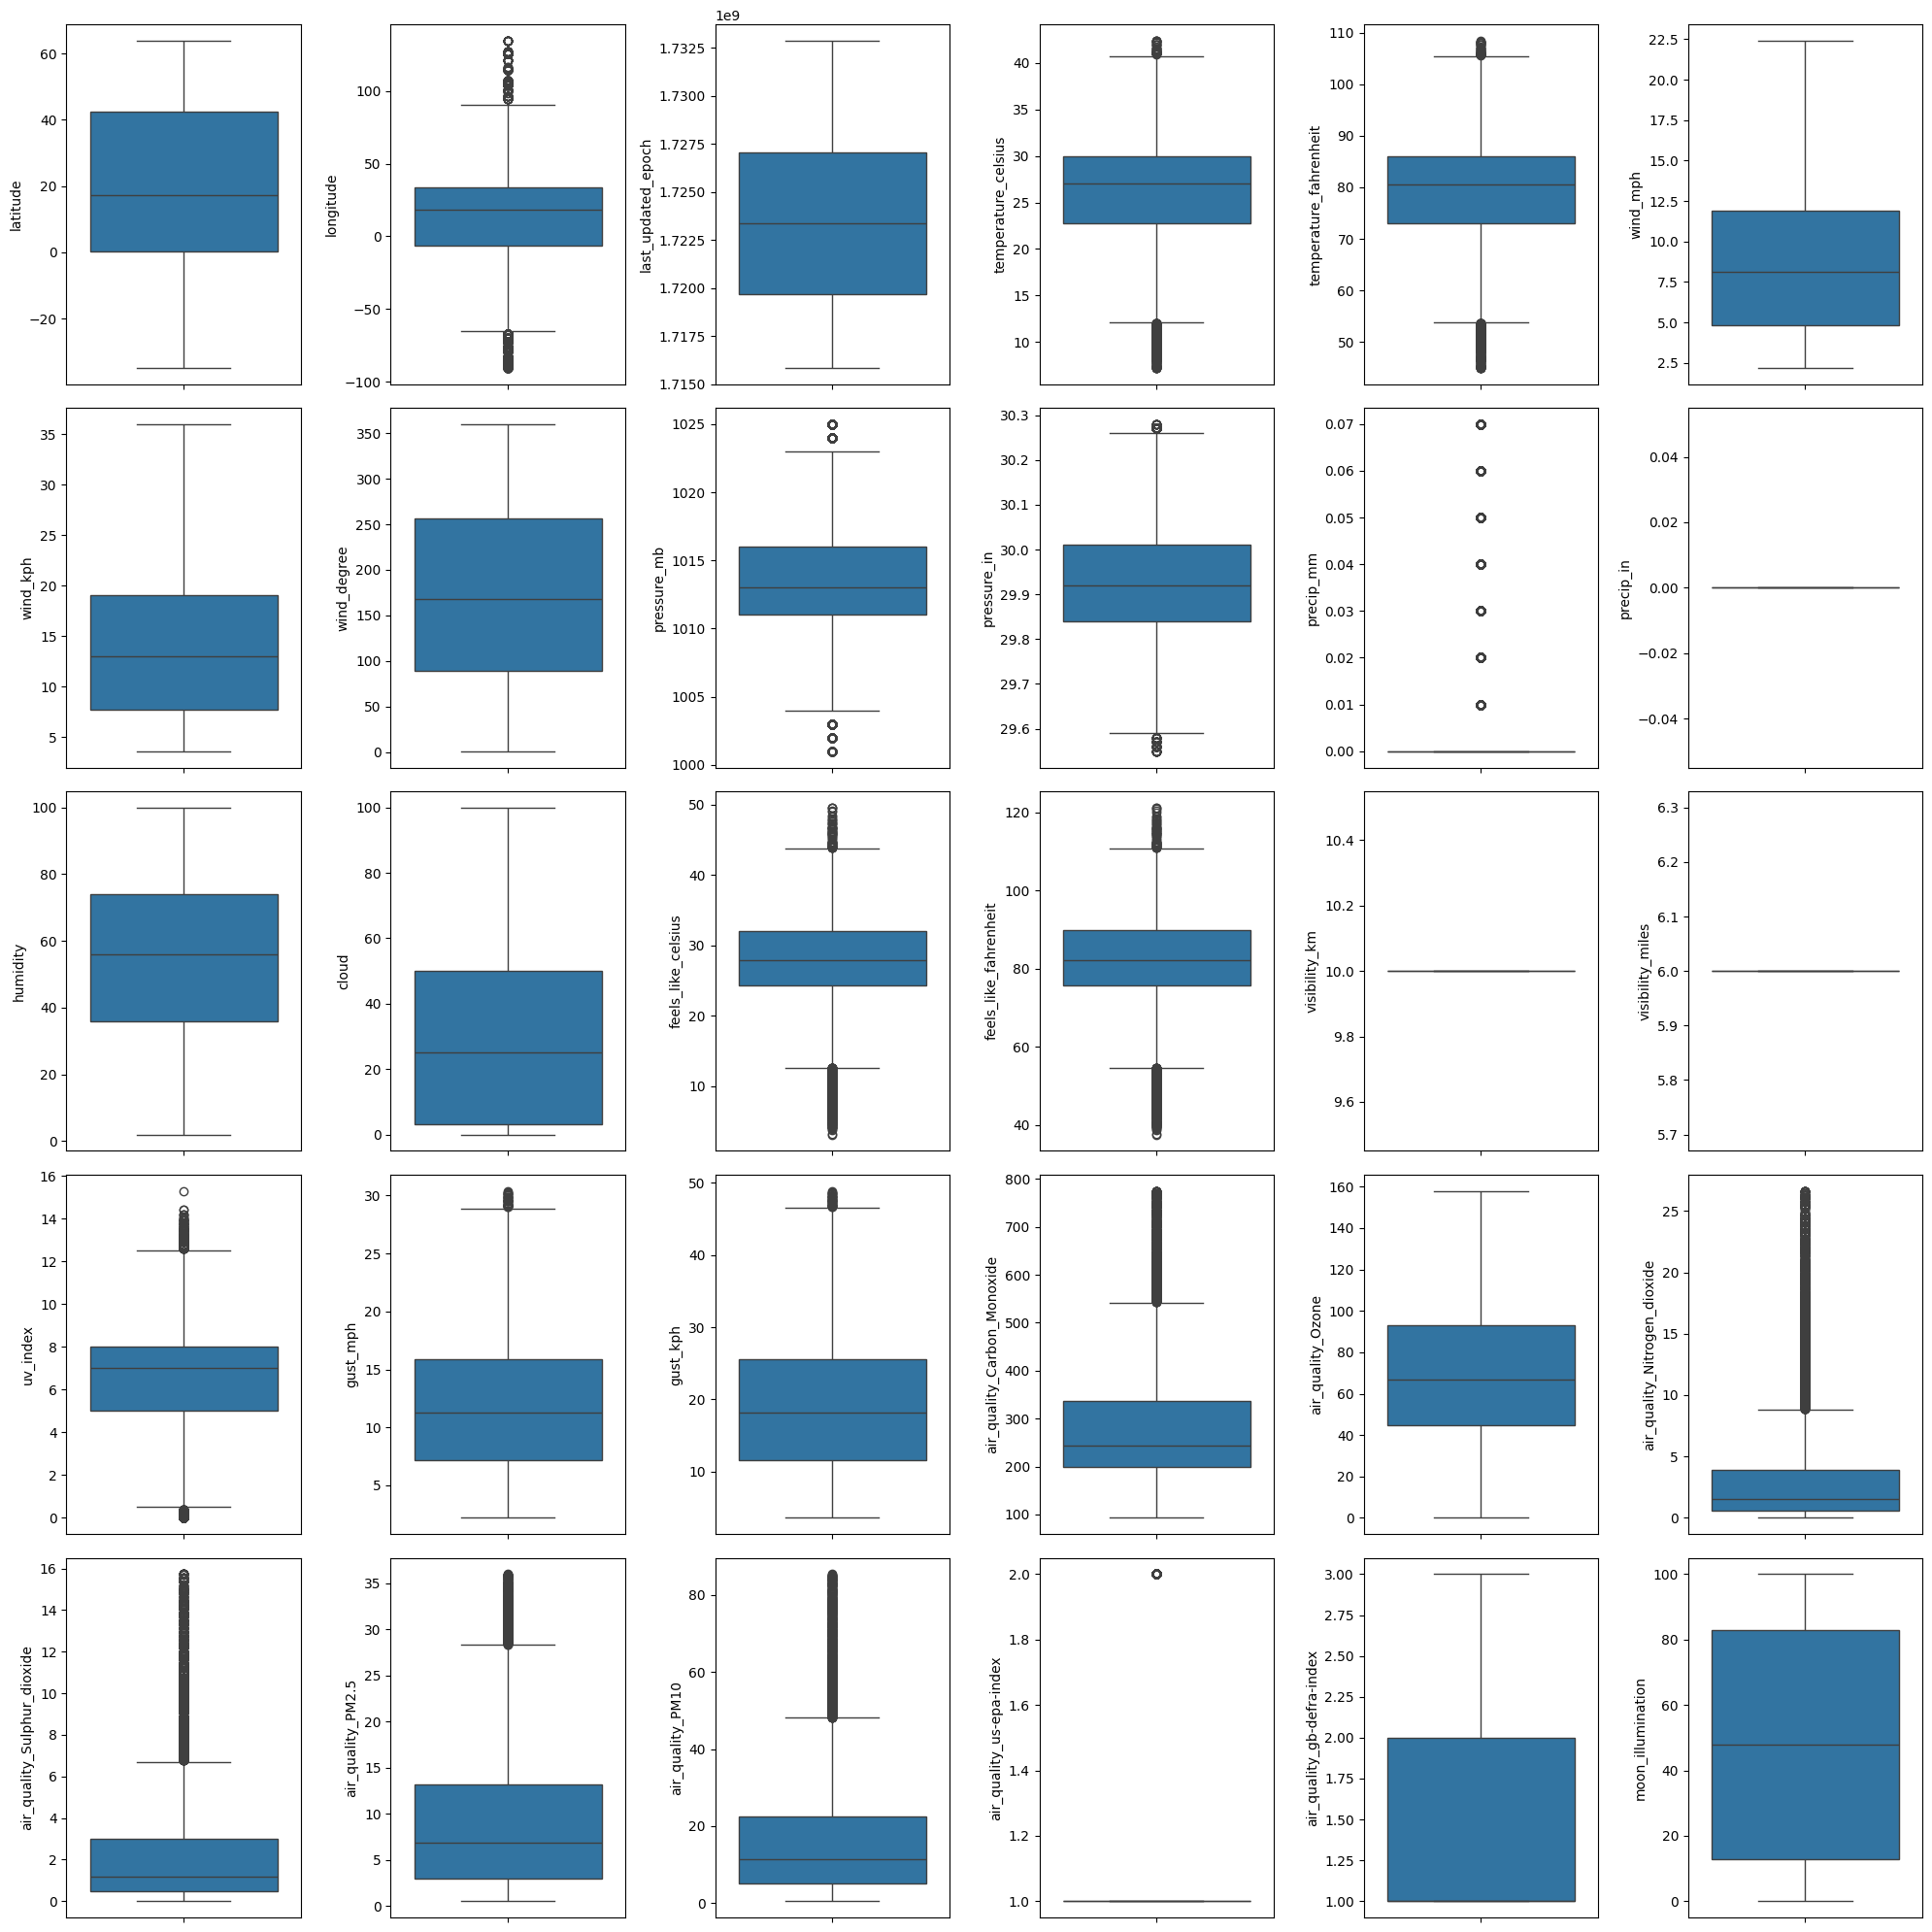

In [ ]:
# Plot Boxplot from the df_cleaned
columns = df_cleaned.select_dtypes(include='number').columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(columns):
    ax = plt.subplot(5, 6, i+1)
    sns.boxplot(df_cleaned[col])
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Upper Bound')
    
    plt.title(column)
    plt.xlabel('')
    
    # Add the legend outside the boxplot area
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()